# Predicting popular recipes

### About Tasty Bytes

Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home. Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients to your door.

### Objective

The product Manager of Tasty Bytes is currently selecting his favorite recipe from a list to display on the homepage. A popular recipe could generate up to a 40% traffic increase on the website, which means more subscriptions for the company. 
The task is to build a model that can predict popular recipes with an 80% success rate. To do so, we are provided with a csv file with recipes which were featured on the home page. 


In [2]:
# Importing needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Data Validation

The data provided to us `recipe_site_traffic_2212.csv` by Tasty Bytes should contain the following information:

![data_description](recipe_data.JPG)

I will load the csv file to a dataframe called df to and check the data provided. 

In [3]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Counting missing values for each column
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

We see that there are 52 missing values for the columns `calories`, `carbohydrate`, `sugar`, `protein` and 373 missing values for `high traffic`. The `servings` columns should be a numeric type but it is an object type here. The rest of the columns have the corresponding type.

### Column 'servings'

Let's have a closer look at the values of `servings`

In [7]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

The reason this column was not converted to a numeric type is because of the text 'as a snack' added after some 4 and 6 values. So let's delete that extra text and convert this column to type integer.

In [8]:
df['servings'] = df['servings'].str.replace(' as a snack','').astype('int8')
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

### Columns 'calories', 'carbohydrate', 'sugar', 'protein'

In [9]:
df[df['calories'].isna()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


The 52 missing values in columns calories, carbohydrate, sugar and protein are for the same rows. I cannot see any relationship between these missing values and the other columns from only looking at the data available. I will then consider these 'missing completely at random'. These missing rows represent 52/947 = 5.49% of the records, which is more than 5%, so I will replace these missing values to not lose too much data.

In [10]:
# checking summary statistics of the numerical variables
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,895.000000,895.000000,895.000000,895.000000,947.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296,3.477297
std,273.519652,453.020997,43.949032,14.679176,36.369739,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,710.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


We can see here that the mean value are much greater than the median for `calories`, `carbohydrate`, `sugar` and `protein`, which indicates some very high values as outliers, which we can confirm looking at the the very high max values compared to the 75th quantile. So I will replace their missing values with the median value of the corresponding column.

In [11]:
cols_with_na = ['calories', 'carbohydrate', 'sugar', 'protein']
df[cols_with_na] = df[cols_with_na].fillna(df[cols_with_na].median())

# check count of missing values
df.isna().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64

### Column 'high_traffic'

Let's look at the values

In [12]:
df['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

The `high_traffic` column has only one unique value 'High' and null when traffic is not high. This is as described, but I will convert this column to a binary integer : 1 for 'High' and 0 otherwise. This will be helpful for analysis purpose and also a pre-processing step for our machine learning model.

In [13]:
df['high_traffic'] = np.where(df.high_traffic == 'High', 1, 0)
df['high_traffic'] = df['high_traffic']
df['high_traffic'].value_counts()

1    574
0    373
Name: high_traffic, dtype: int64

### Column 'category'

In [14]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

`Category` should have 10 different values according to the description of the data, but we have 11. The category "Chicken Breast" was not mentionned. We see that  values are more or less evenly disdritbuted but values are not exclusive. For example, "Lunch/snack" could also include "chicken" or "Vegetable". So it could be designed better for analysis purpose. For this study, I will leave it as it is to see what insight could be extracted from here.

### Column 'recipe'

the summary statistics for that column did not show any abnomalities but we can check if the count of unique values matches the number of rows.

In [15]:
df['recipe'].nunique()

947

We have 947 unique values for 947 rows so nothing to change here.

# Exploratory Data Analysis

### Distribution of 'calories', 'carbohydrate', 'sugar', 'protein'
Let's first plot the distribution of the 4 numerical variables `calories`, `carbohydrate`, `sugar` and `protein` where we spotted a big difference between mean and median.

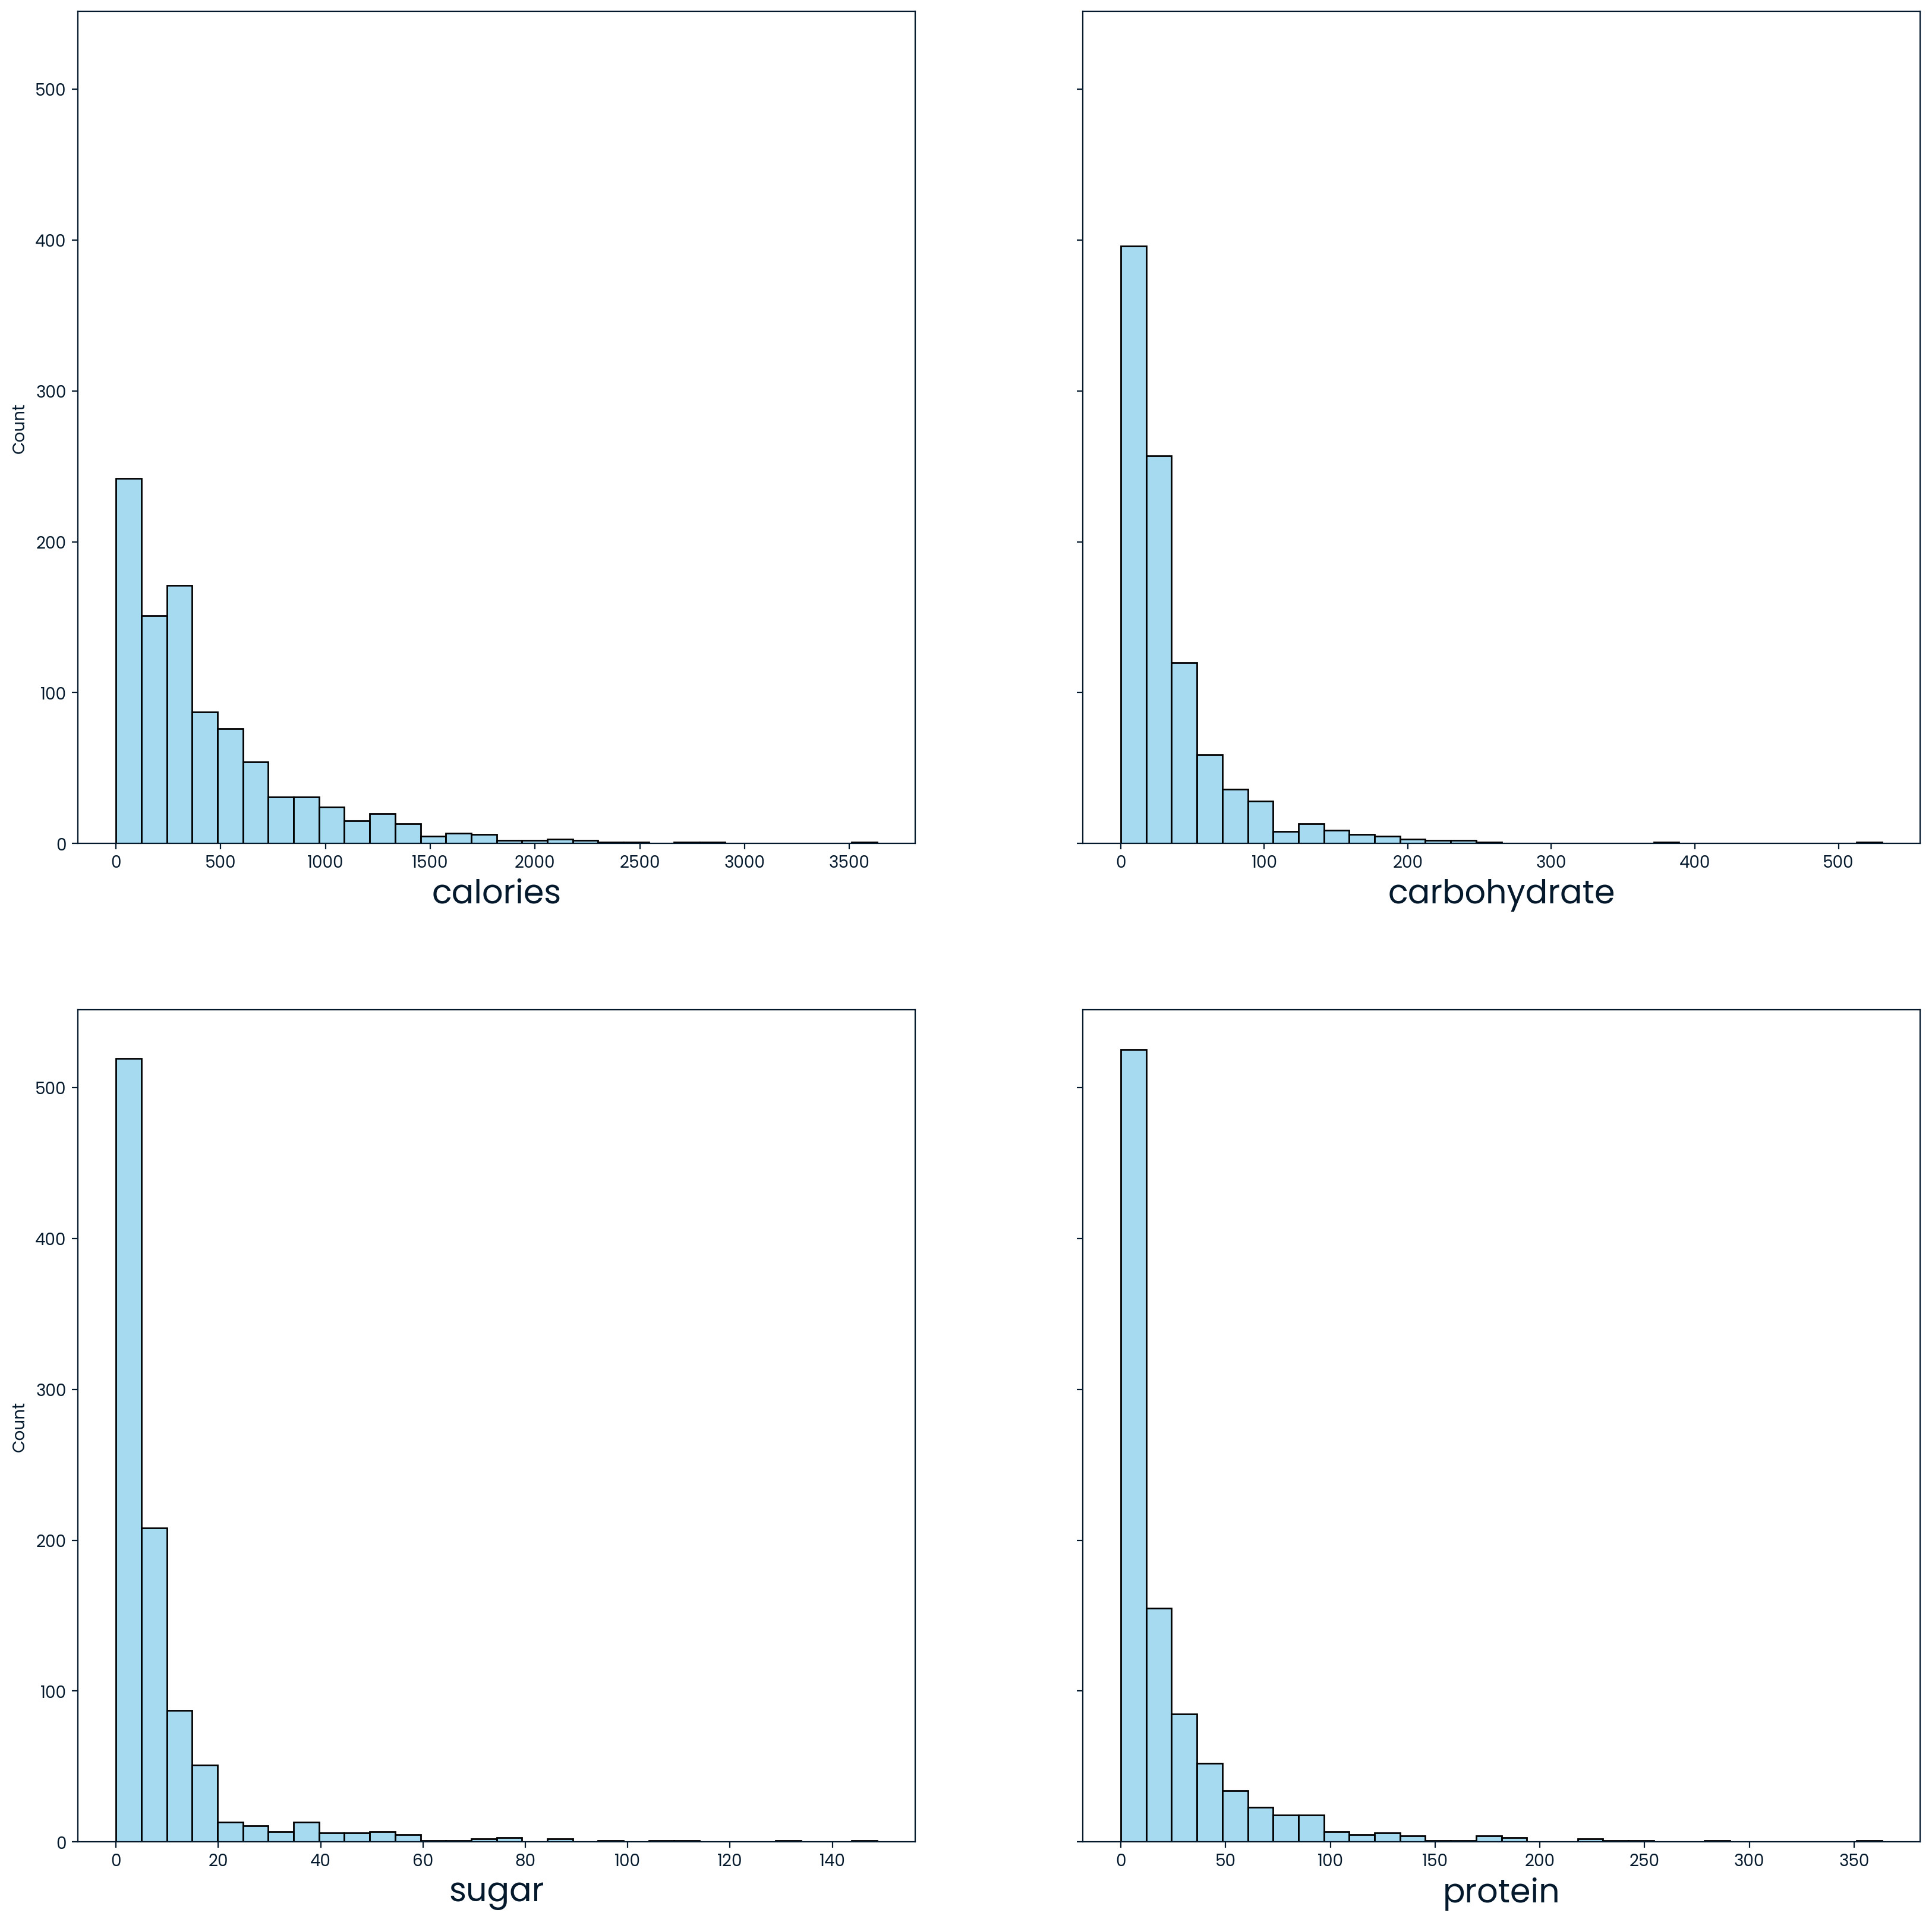

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
for ax, feature in zip(axes.flat, ['calories', 'carbohydrate', 'sugar', 'protein']):
    sns.histplot(df[feature] , color="skyblue", ax=ax, bins = 30)
    ax.set_xlabel(feature, size = 20)
plt.show()

This strong positive skewness may bias our analysis so I will apply a log transformation to these columns and call the new columns:   
`calories_log`  
`carbohydrate_log`  
`sugar_log`  
`protein_log`  
  
`protein` has some 0 values from looking at the minimum value of 0 so I will offset the log function a bit to avoid -infinity values

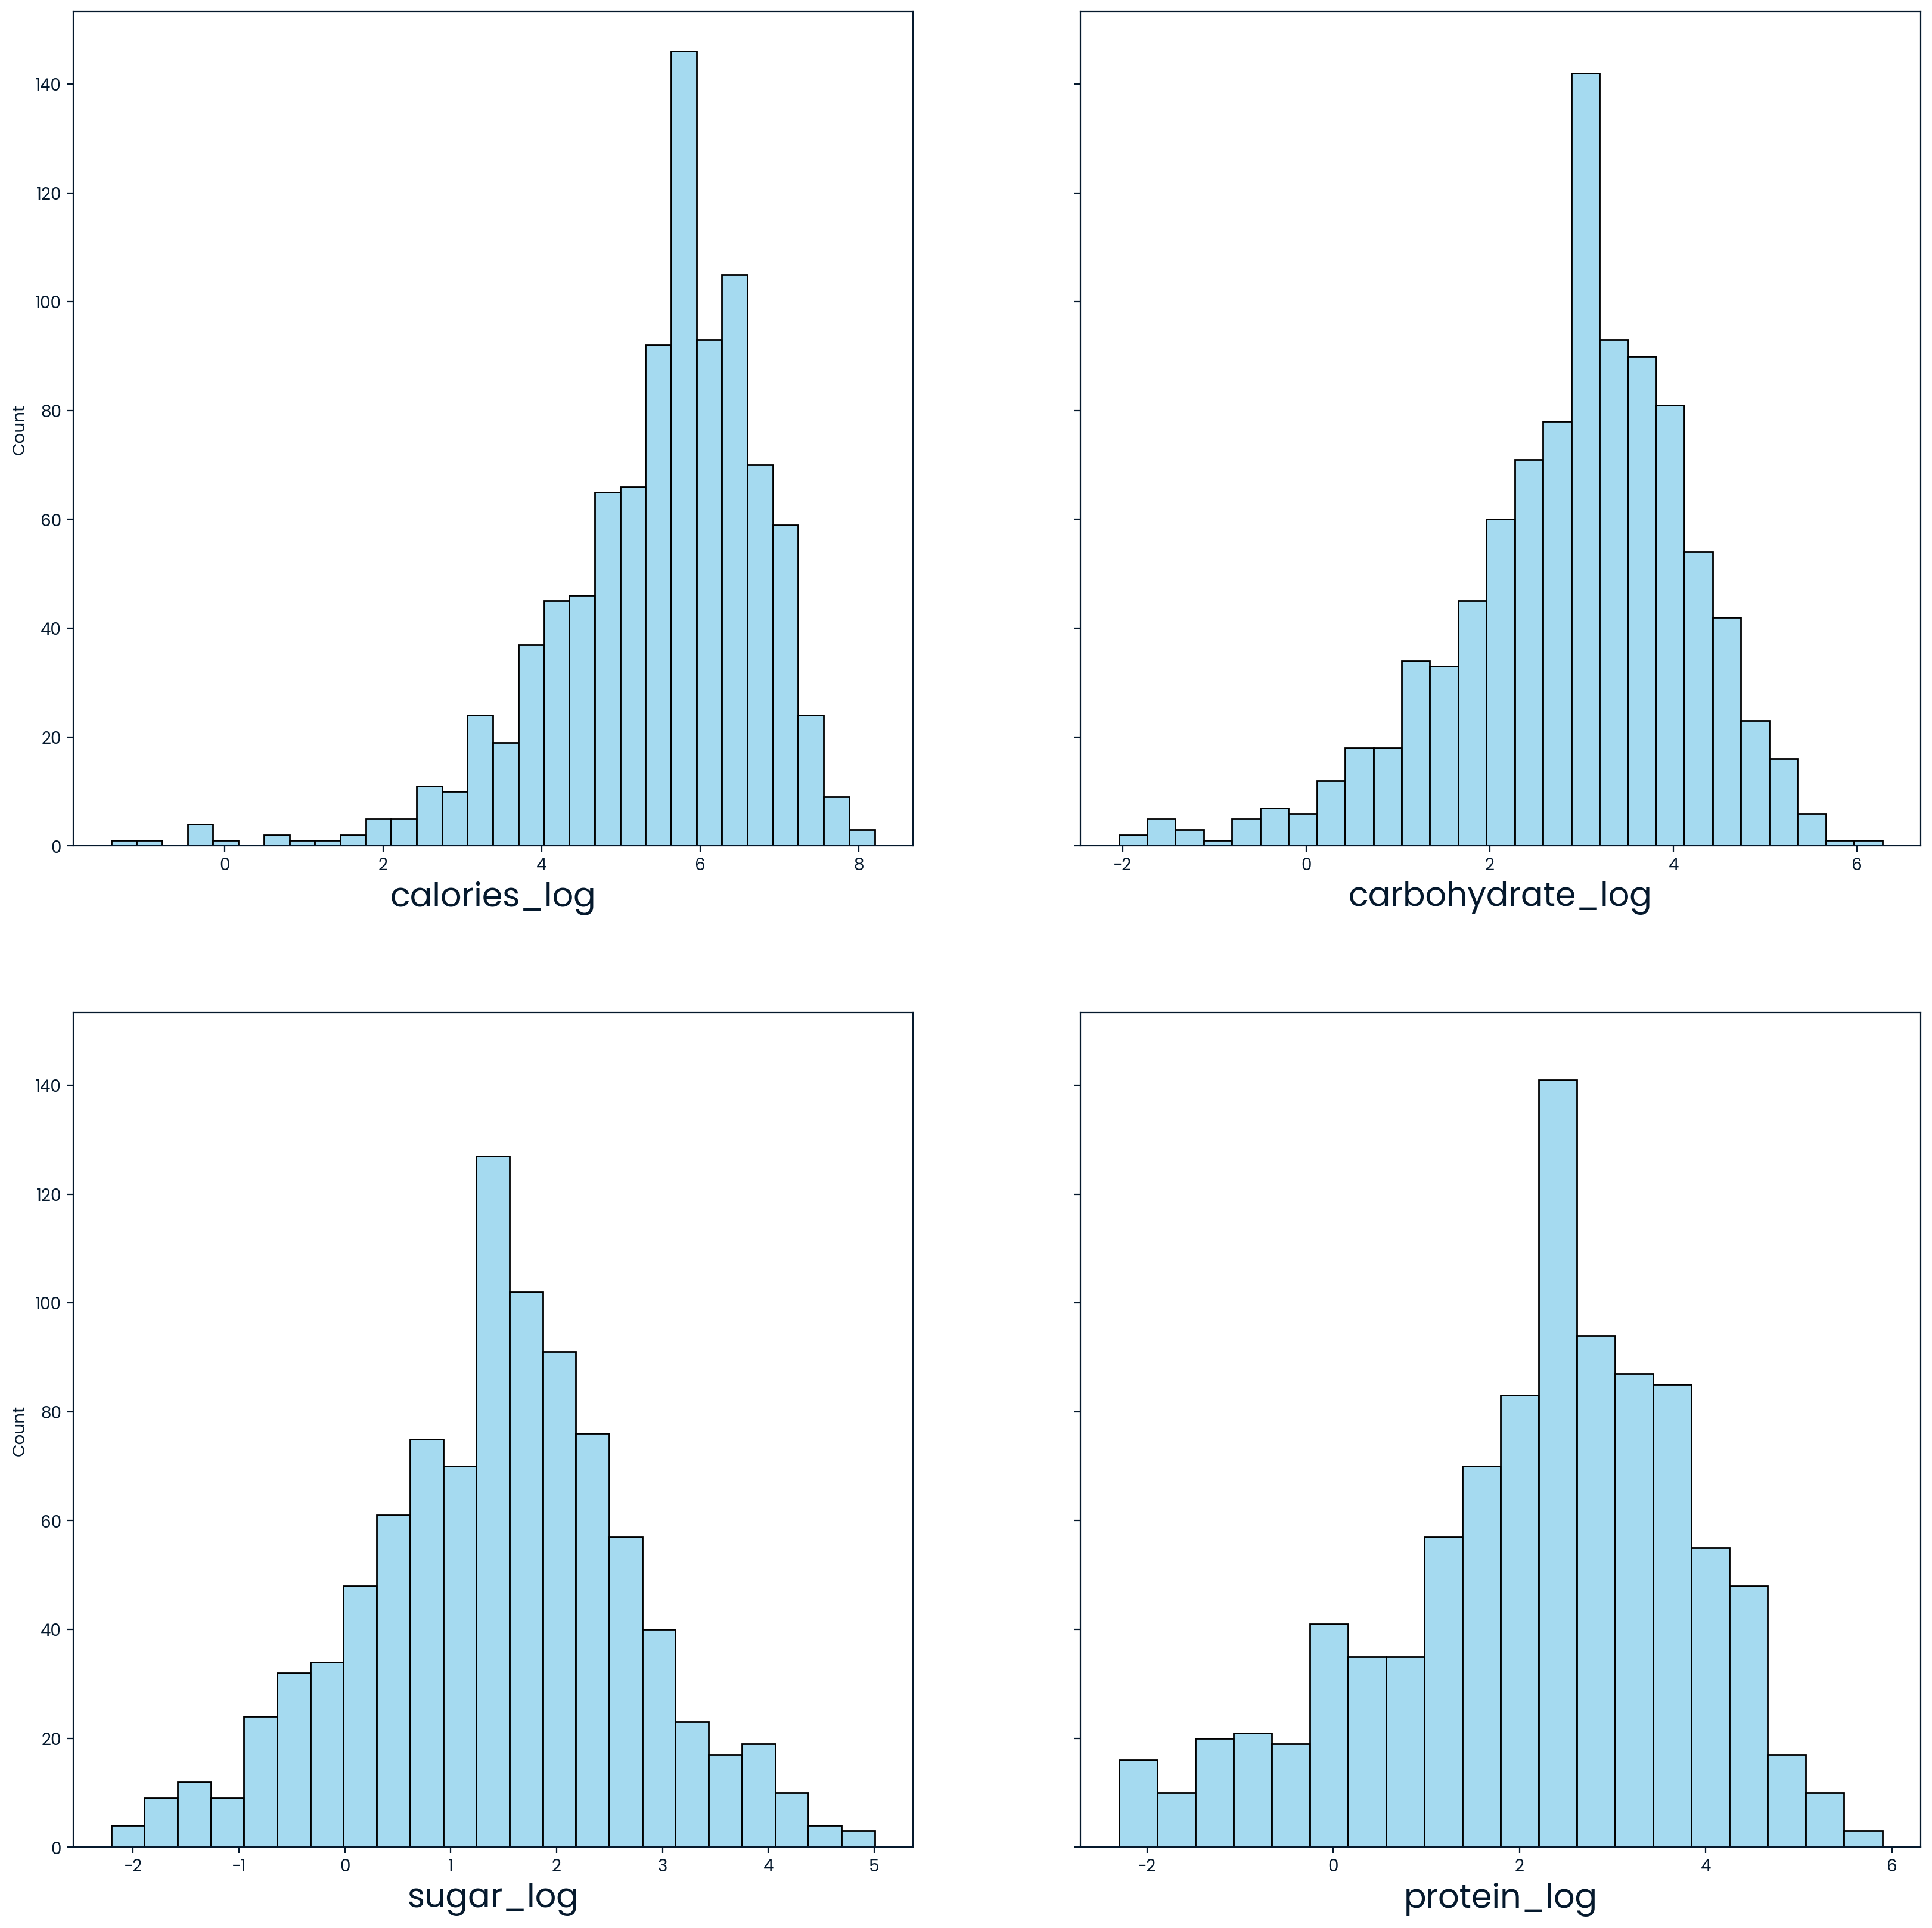

In [17]:
# apply log(x+0.1) to handle the 0 values
cols_log = []
for col in cols_with_na :
    new_col = col + '_log'
    df[new_col] = np.log(df[col]+0.1)
    cols_log.append(new_col)

fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
for ax, feature in zip(axes.flat, cols_log):
    sns.histplot(df[feature] , color="skyblue", ax=ax)
    ax.set_xlabel(feature, size = 20)

plt.show()

We can see the log transformation is showing a closer distribution to a normal distribution for the 4 variables.

### Distribution of 'servings'

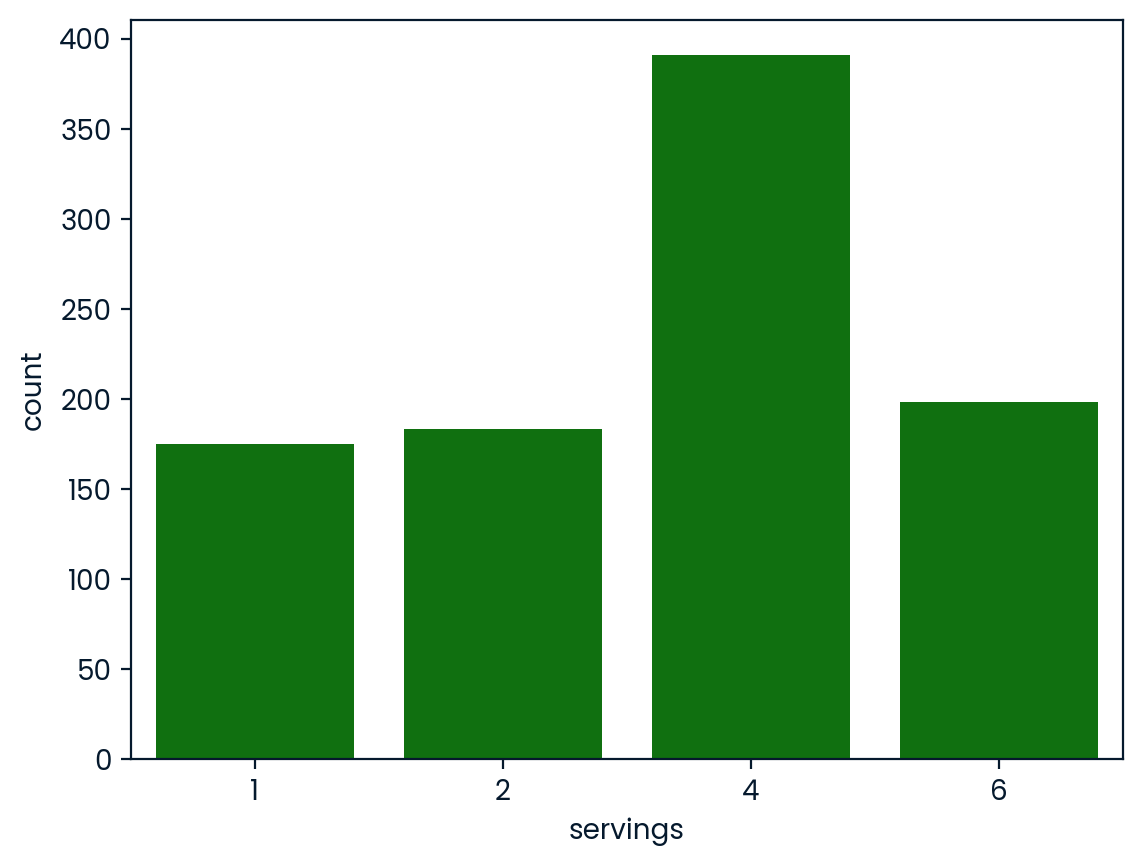

In [18]:
sns.countplot(df, x='servings' , color="green")
plt.show()

We see that we have more 4-serving recipes compared to others in our data so our analysis and model will predict better this specific number of servings.

### Correlation between numerical variable

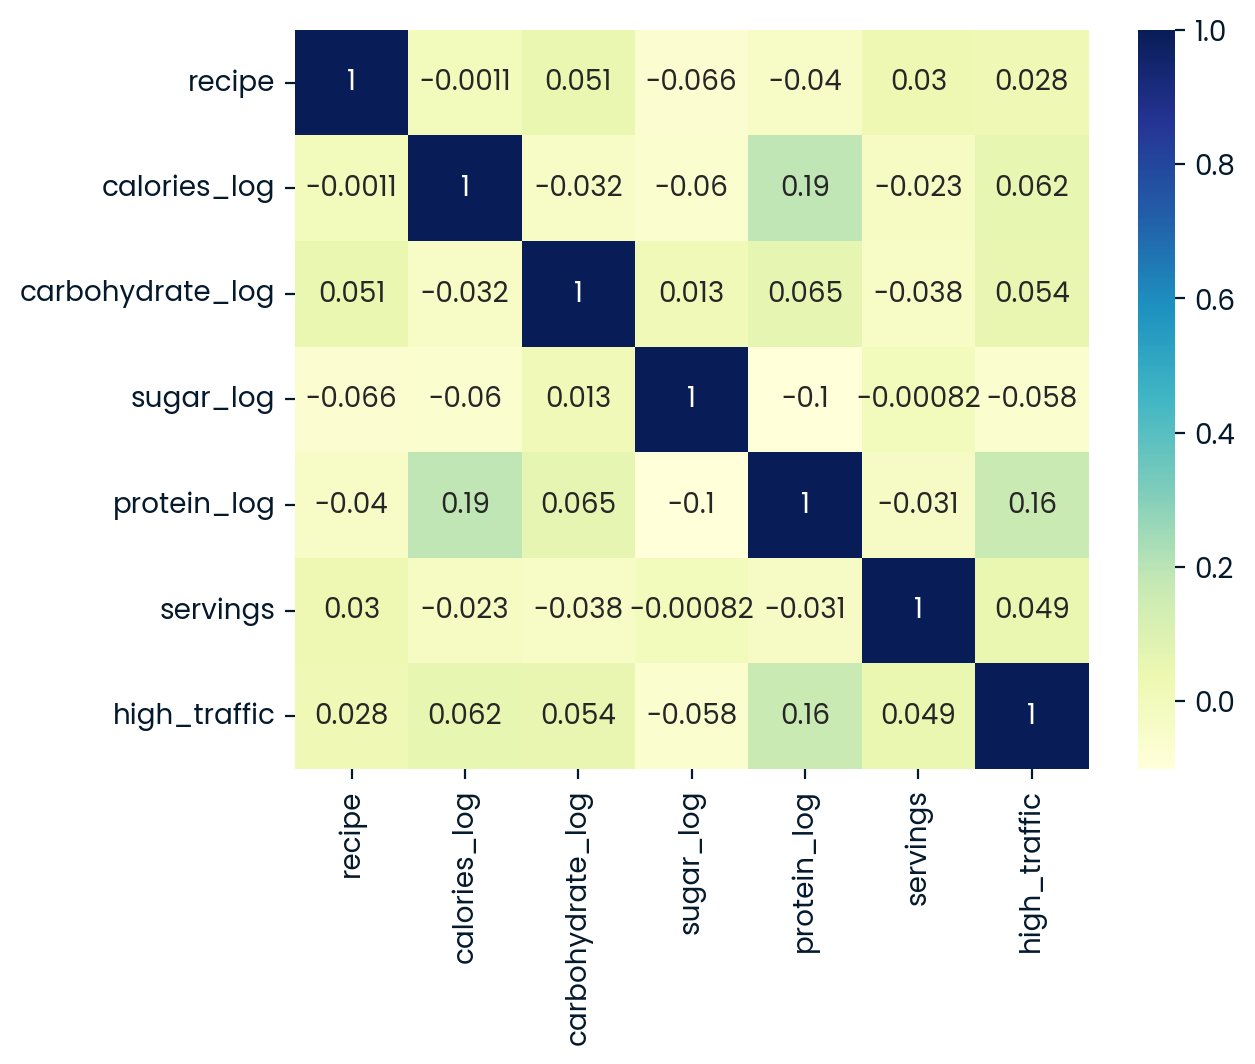

In [19]:
sns.heatmap(df[['recipe', 'calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log', 'servings', 'high_traffic']].corr(), cmap="YlGnBu", annot=True)
plt.show()

There is no significant linear relationships between the different numerical variables so we can assume they are considered independant. We also cannot see any obvious relationship with the `high_traffic` we need to predict, except a slight positive relationship with `protein_log`.

### high_traffic by category

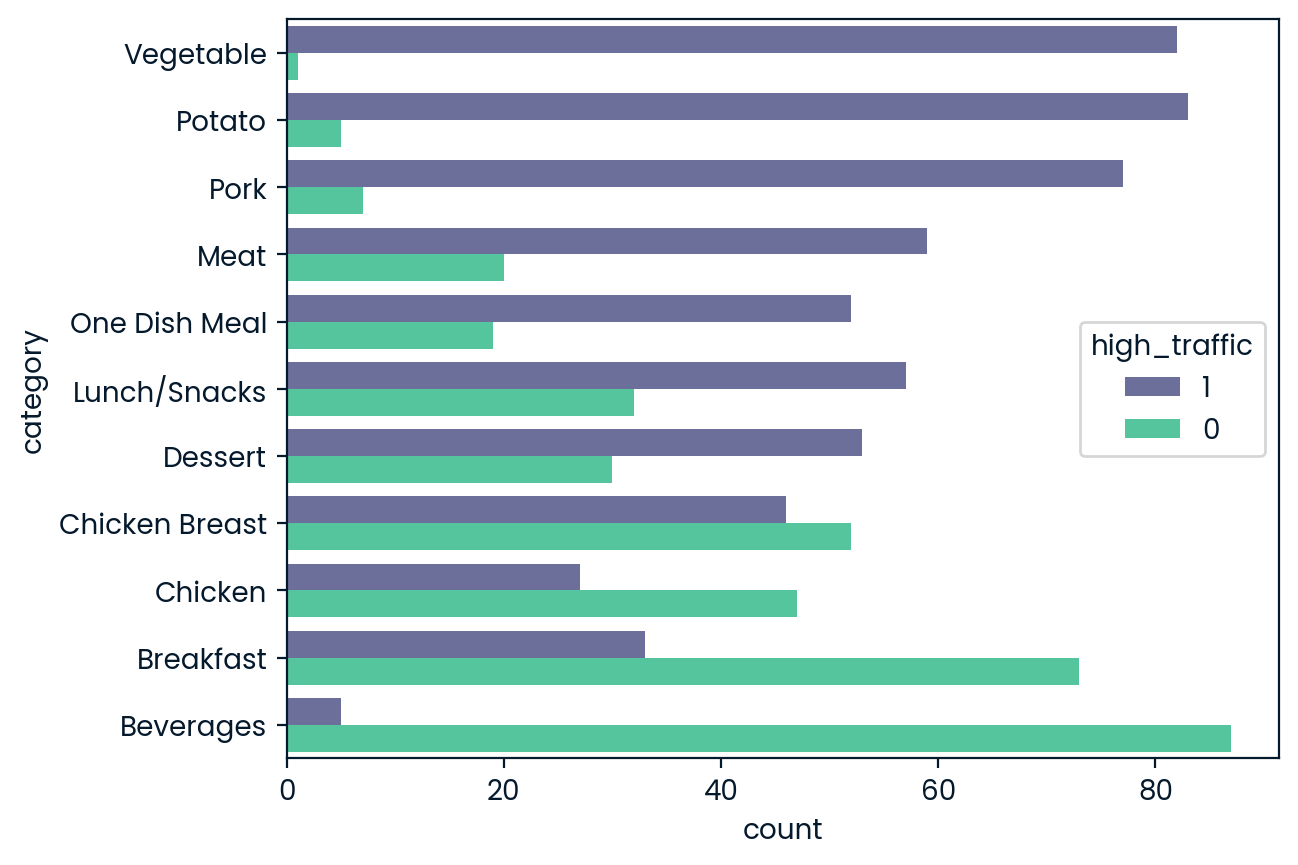

In [20]:
# List of categories ordered by proportion of 'High' traffic
order_high_traffic = df.groupby(['category'])['high_traffic'].value_counts(normalize=True).loc[(slice(None),1)].sort_values(ascending=False).index.get_level_values(0)

# Count plot of vlaue of high_traffic by category value
sns.countplot(data=df, y='category', hue='high_traffic',order = order_high_traffic, hue_order=[1,0])
plt.show()

The distribution of recipes among categories are similar but when looking at the count / proportion of high traffic generated, we can see that Vegetable, Potato, Pork, Meat, One Dish Meal are associated with the highest proportion of high traffic. We also see that Beverages and Breakfast are more likely to generate low traffic. So it looks like the `category` variable is showing the most impact on `high_traffic`.

# Model Development

The goal here is to predict whether a recipe will generate high traffic when it is featured on the home page. 

Here's an example of the information displayed on the home page:  

![recipe](recipe_display.JPG)

Some interesting data is missing from the data provided. I believe the 'cost per serving' and the 'time to make' could be valuable features to consider in our model. The name of the recipe as well as the list of ingredients could also be helpful in correctly predicting traffic/popularity of a recipe as we saw that category containning specific ingredients (vegetables, potato, pork, meat) shows higher rate to generate high traffic.  

The response variable here is binary : `high_traffic` can take the value 1 when it is high and 0 when it is not. 
It is a binary classification surpervised machine learning algorithm we need to develop. The client wants to correctly predict high traffic recipe 80% of the time and minimize the chance of showing unpopular recipes. So our focus in on the specific high value (1) for the label `high_traffic`. Tasty Bytes wants to maximise the prediction of high traffic so we will be looking at maximising the precision metric to get over 80%, while keeping a look on the recall as we don't want to discard too many popular recipes.

Except for the `category` feature, I was not able to establish any other significant relationship between `high_traffic` and other features. I will then use K-Nearest Neighbors classification as a base model.

I will first one-hot-encode the `category` feature and then standardise all the features to be able to apply the model. I will then compare with a Logistic Regression model.

## Preprocessing


### One Hot Encoding 'category'

In [21]:
# One hot encoding 'category'
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['category']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['category']))

### Creating features and labels - Splitting Data to training set and test set

We see in the recipe display that the unique recipe identifier `recipe` is not shown, and the correlation with `high_traffic` was very low. So I will discard this feature in the model to simplify it and reduce potential noise. So we will consider the following features : `calories_log`, `carbohydrate_log`, `sugar_log`, `protein_log`, `servings`, and the one-hot-encoded `category`.

In [22]:
# Defining features X
X_df = pd.concat([df.drop(['recipe', 'calories', 'carbohydrate','sugar','protein','high_traffic','category'], axis = 1), encoded_df], axis=1)
X = X_df.values

# Defining label y
y = df['high_traffic'].values

# setting random seed for reproducibility
SEED = 133

# Splitting data to train set and test set with 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED, stratify=y)

### Scaling features through Standard Scaling

In [23]:
# Standarize features in train set and test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit a K-Nearest Neighbor Model as a base model

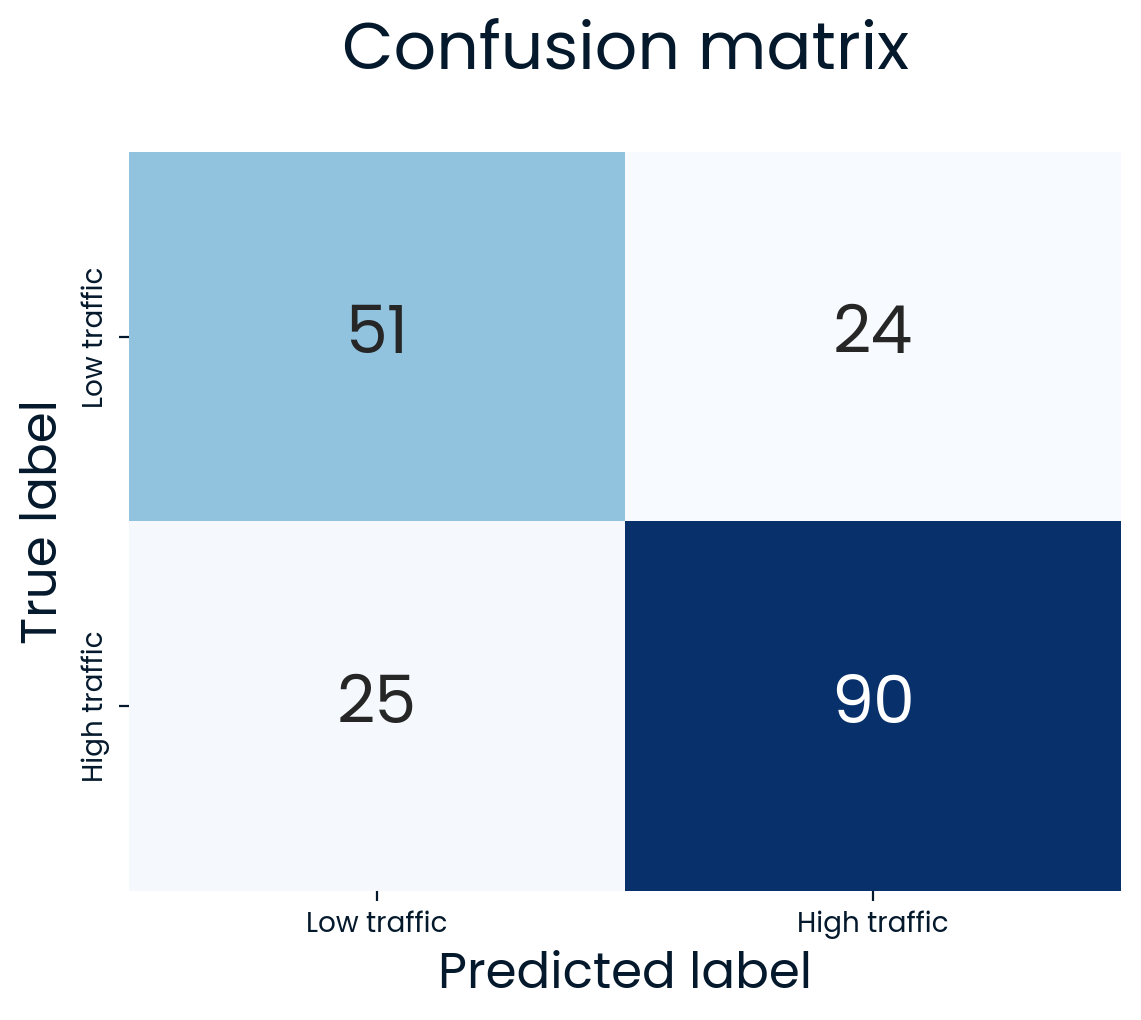

              precision    recall  f1-score   support

           0       0.67      0.68      0.68        75
           1       0.79      0.78      0.79       115

    accuracy                           0.74       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.74      0.74      0.74       190



In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance on test set
c_mat = confusion_matrix(y_test, y_pred_knn)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Low traffic','High traffic']
sns.heatmap(c_mat, annot=True, annot_kws={"fontsize":24}, cbar=False, cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion matrix', fontsize=24, pad=30)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)

plt.show()

print(classification_report(y_test, y_pred_knn))


The knn classifier model with k=10 gets a precision of **79%** on the test set which takes us pretty close to the **80% target**. It is also much better than the current 60.6% performance of the dataset provided. Let's see now how it compares to a Logistic Regression Model

### Fit a Logistic Regression model to compare

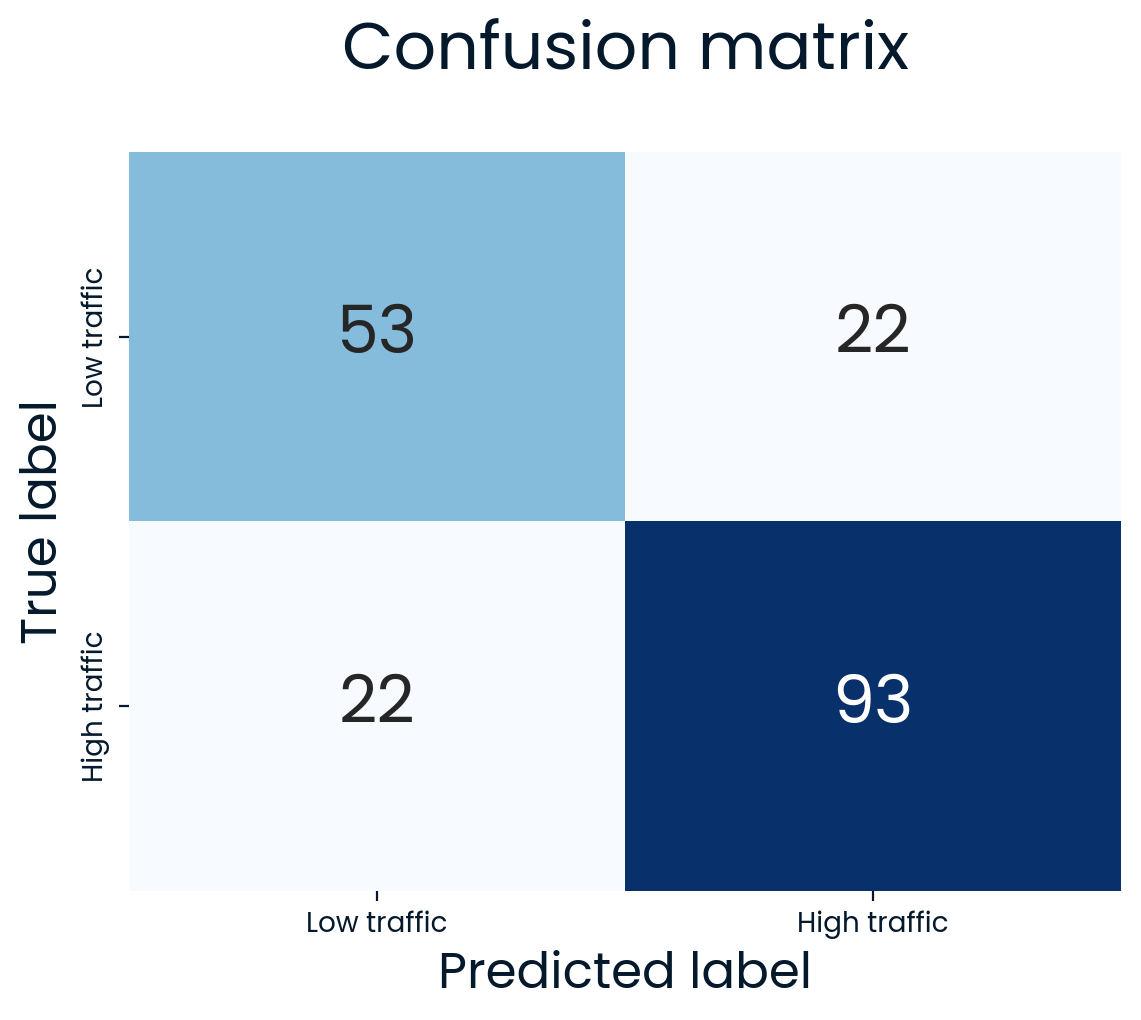

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.81      0.81      0.81       115

    accuracy                           0.77       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.77      0.77      0.77       190



In [31]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

# Evaluate performance on test set
c_mat = confusion_matrix(y_test, y_pred_lr)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Low traffic','High traffic']
sns.heatmap(c_mat, annot=True, annot_kws={"fontsize":24}, cbar=False, cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion matrix', fontsize=24, pad=30)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)

plt.show()

print(classification_report(y_test, y_pred_lr))

The logistic regression gives a precision of **81%** on the test set which is **2% better** than the KNN model and reaches the target of 80%. This is only one result on one specific test set so let's check further how do these 2 models compare.

### Cross Validation to compare the 2 models

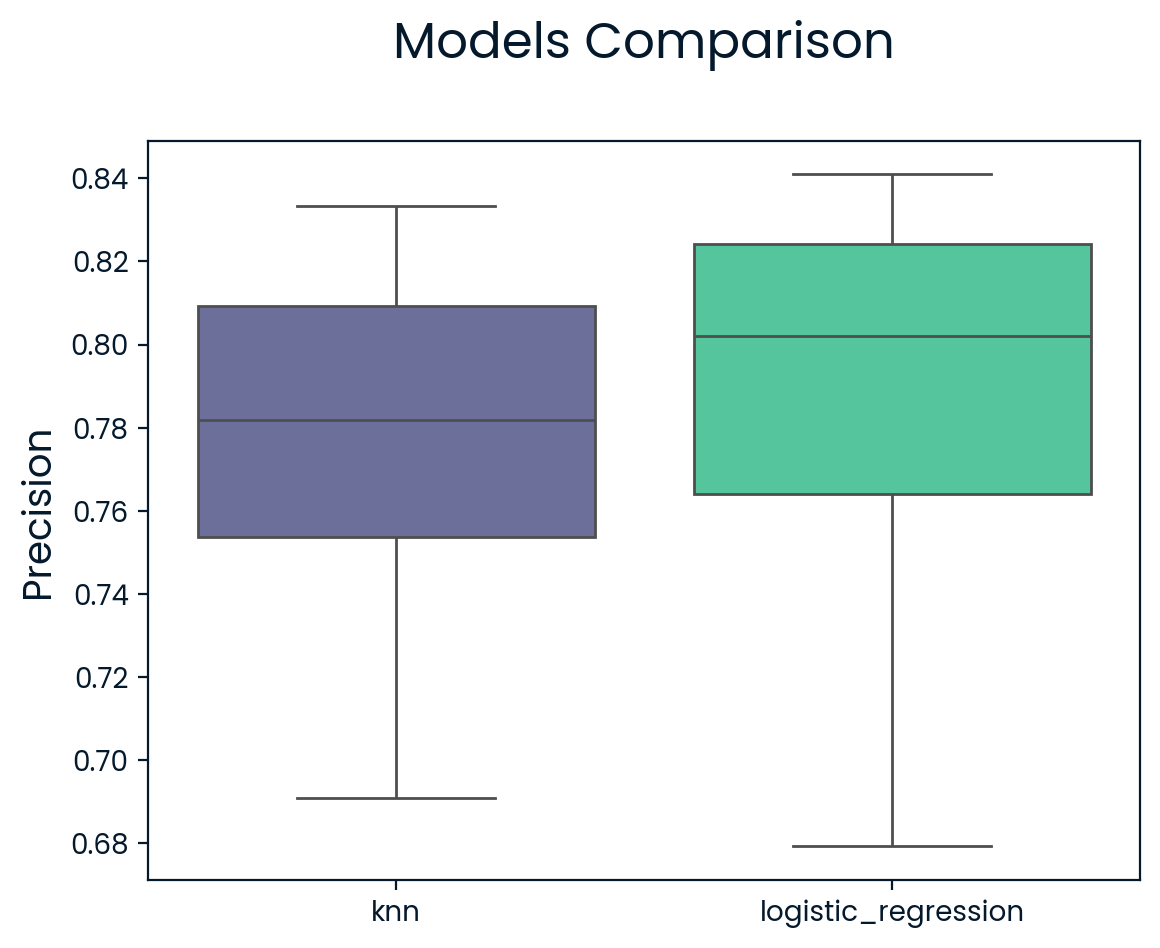

In [26]:
models = [('knn', knn), ('logistic_regression', lr)]
names=[]
results=[]
for name, m in models:
    cv_results = cross_val_score(m, X_train_scaled, y_train, cv=10, scoring='precision')
    results.append(cv_results)
    names.append(name)

fig, ax = plt.subplots()
sns.boxplot(results)
ax.set_xticklabels(names)
ax.set_title('Models Comparison', pad=30, fontsize = 18 )
ax.set_ylabel('Precision', fontsize=14)
plt.show()

We can see here that the logistic regression does perform better precision wise than the KNN model so we will choose and fine-tune the logistic regression model to see if we can get even better results

### Fine-tuning Logistic Regression

We will use Cross Validation to fine-tune the hyperparameters of our Logistic Regression Model by passing a list of values to test on.


The best hyperparameters found are:  {'C': 0.1, 'solver': 'liblinear'}
They give a precision of:  0.7935599863557401


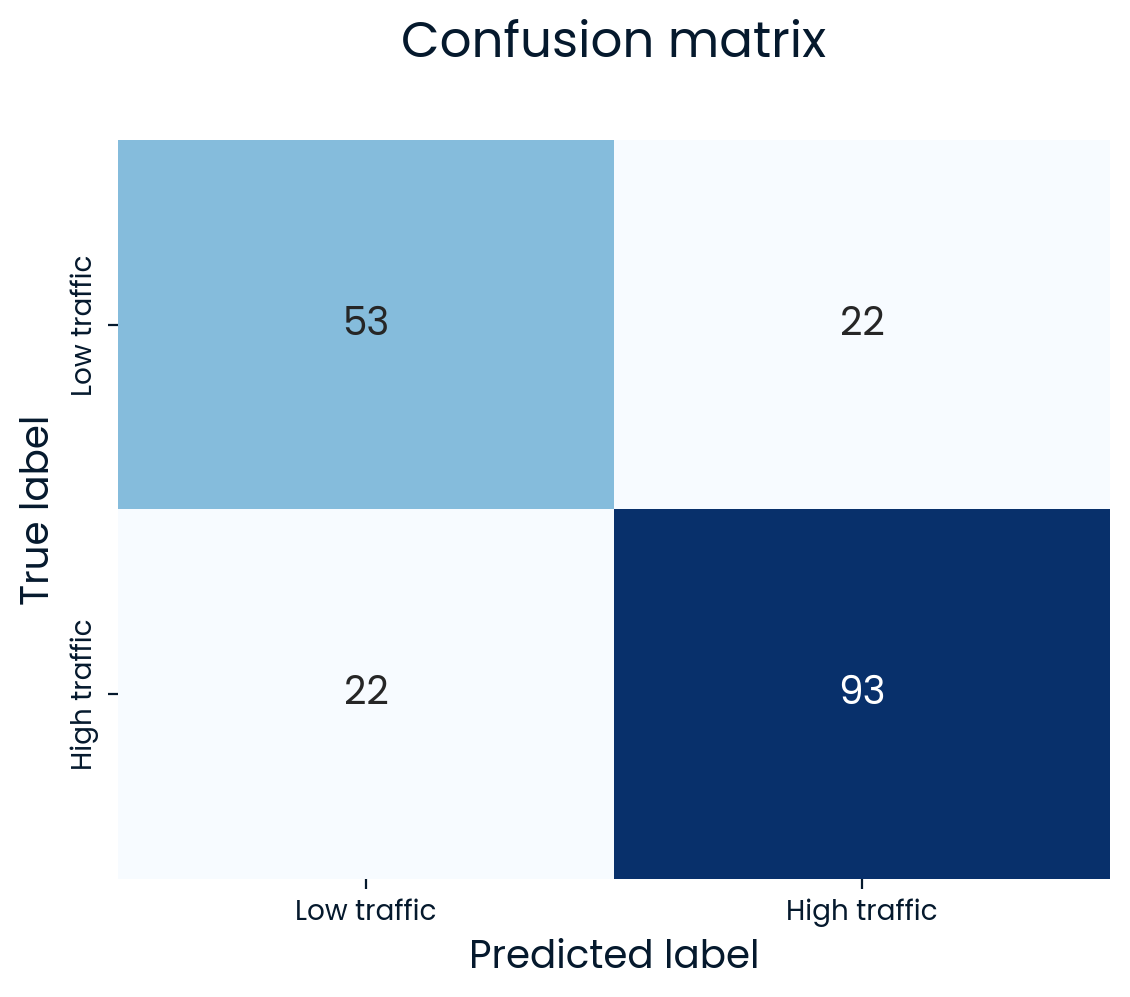

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.81      0.81      0.81       115

    accuracy                           0.77       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.77      0.77      0.77       190



In [27]:
# Fine-tuning through cross validation

param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(lr, param_grid, cv=10, scoring='precision', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print('The best hyperparameters found are: ', grid.best_params_)
print('They give a precision of: ',grid.best_score_)

# Fit the best performing model to training set
tuned_lr = grid.best_estimator_

# Fit the best estimator to the train set
tuned_lr.fit(X_train_scaled, y_train)
y_pred_tuned_lr = tuned_lr.predict(X_test_scaled)

# Evaluate performance on test set
c_mat = confusion_matrix(y_test, y_pred_tuned_lr)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Low traffic','High traffic']
sns.heatmap(c_mat, annot=True, annot_kws={"fontsize":14}, cbar=False, cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion matrix', fontsize=18, pad=30)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

plt.show()

print(classification_report(y_test, y_pred_tuned_lr))

We don't see any difference of performance on the test set between the tuned model and the original Logistic regression we applied. So let's see how they compare in cross validation.

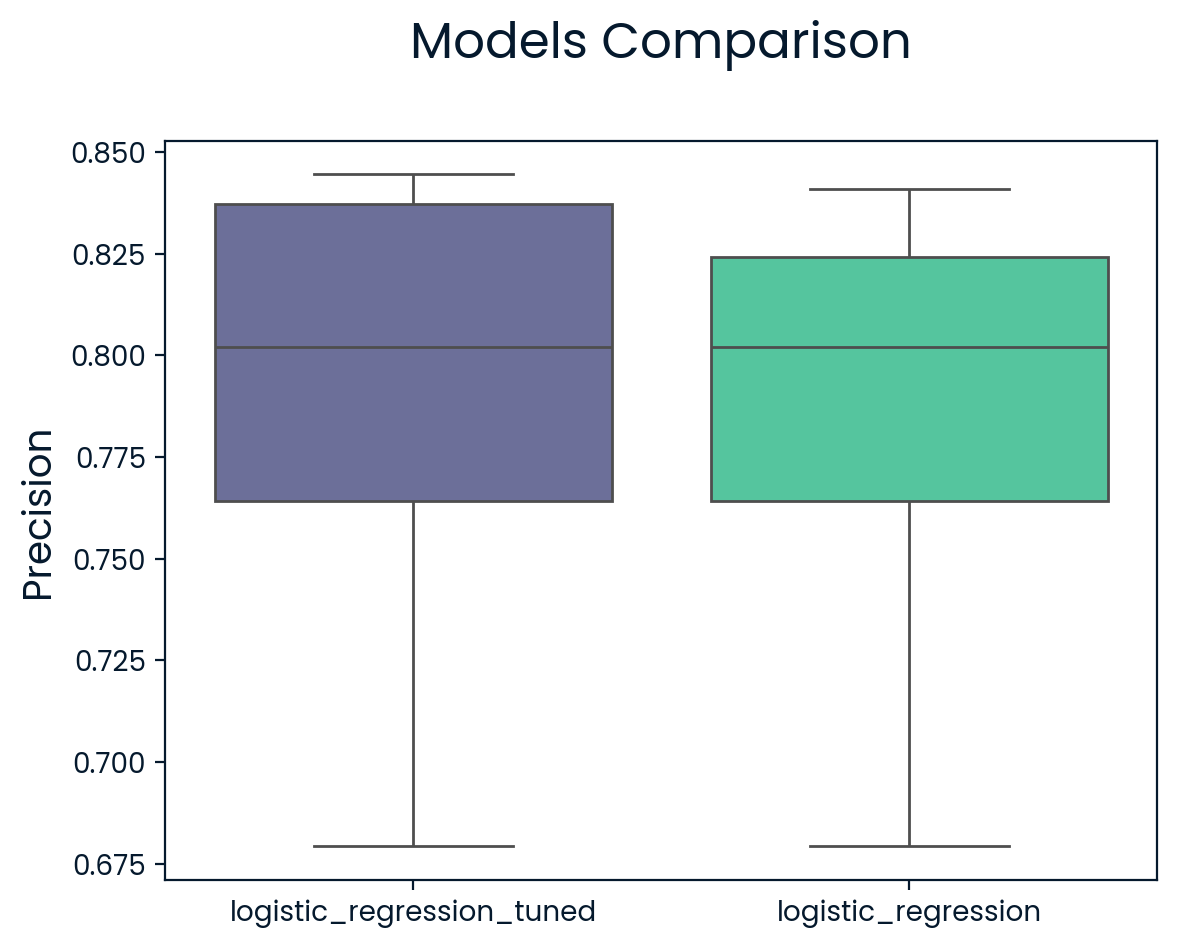

In [28]:
models = [('logistic_regression_tuned', tuned_lr), ('logistic_regression', lr)]
names=[]
results=[]
for name, m in models:
    cv_results = cross_val_score(m, X_train_scaled, y_train, cv=10, scoring='precision')
    results.append(cv_results)
    names.append(name)

fig, ax = plt.subplots()
sns.boxplot(results)
ax.set_xticklabels(names)
ax.set_title('Models Comparison', pad=30, fontsize = 18 )
ax.set_ylabel('Precision', fontsize=14)
plt.show()

Even though the median is pretty much the same, it looks like the tuned model has a higher chance to perform better. So we will use the tuned Logistic Regression going forward.

### Features importance
We can use the tuned model to see what coefficient it gave to the different features, which will tell us how much they are influencing the predicted label `high_traffic`.

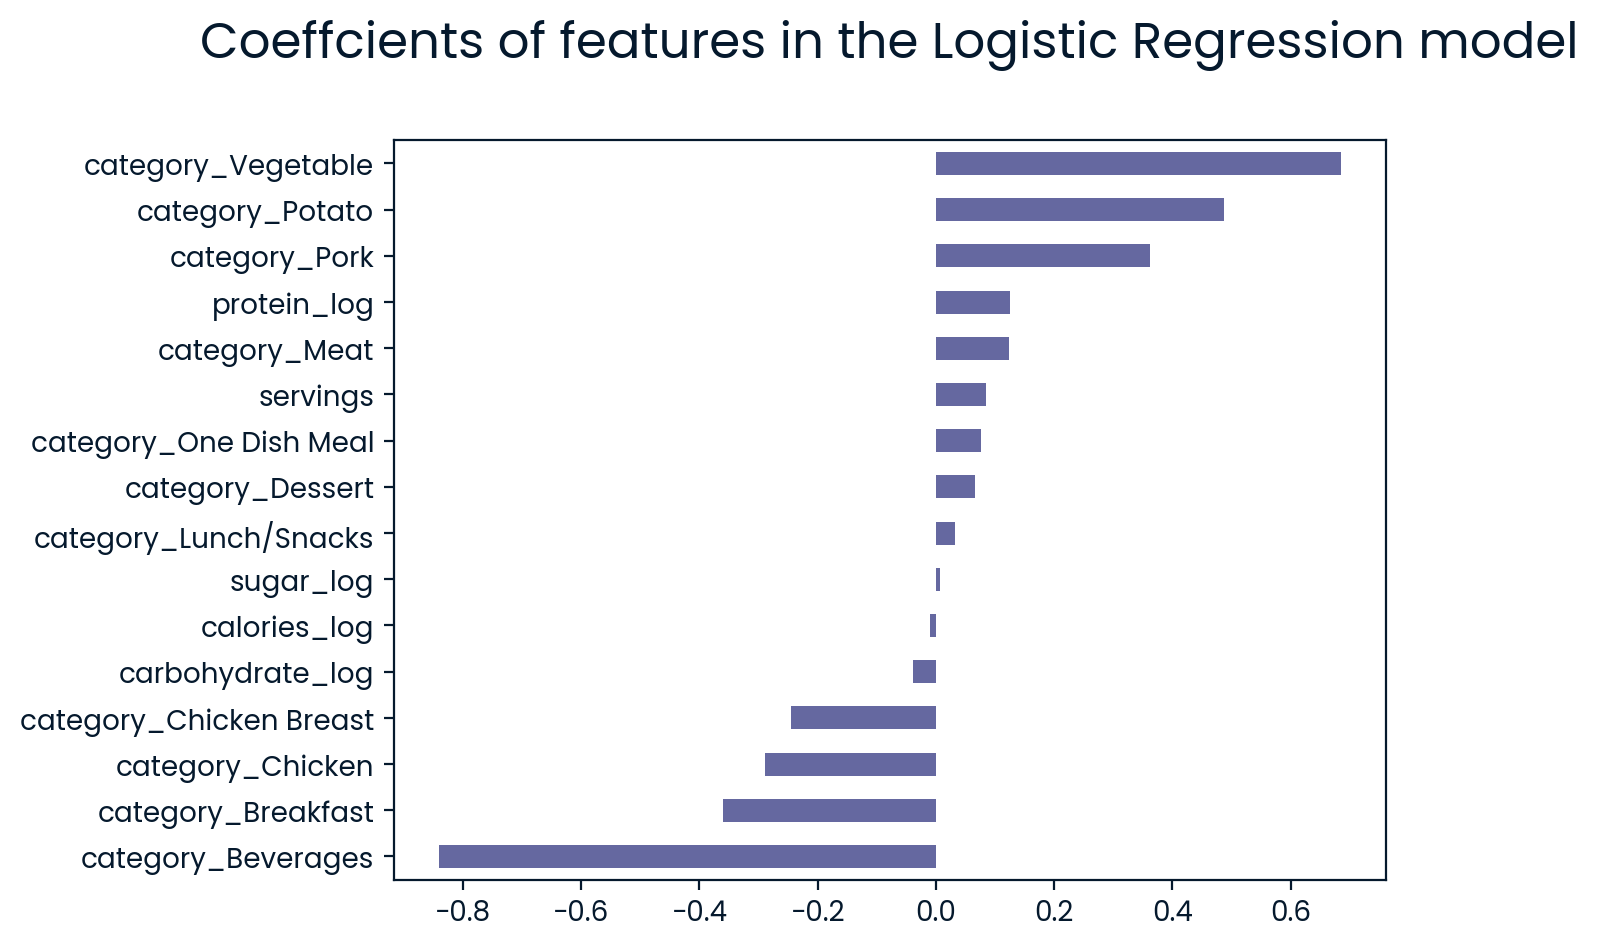

In [29]:
feat_importances = pd.Series(tuned_lr.coef_[0], index=X_df.columns).sort_values()
feat_importances.plot(kind='barh')
plt.title('Coeffcients of features in the Logistic Regression model', pad=30, fontsize=18)
plt.show()

As observed in the EDA, the model confirm the importance of the `category` column to predict the label. Vegetable, potato, pork are significantly associated with high traffic, whereas Beverages, Breakfast and chicken are associated with low traffic.

# Metrics for the business

As the target here is to achieve 80% of the recommended recipes to generate high traffic, you want to monitor the rate of high traffic for all the recipe featured on your home page that the model predicted as High traffic. To be able to compare, the threshold to classify traffic to be 'High' needs to stay the same.
The current model chosen performed at 81% on 93+22 = 115 recipes it predicted to be high traffic. So let's round this to 100 recipes and monitor how the model performs for the last 100 recipes it recommended.
So one indicator would be :

**$\frac{NH_{100}}{100}$**

$NH_{100}$ = Number of high traffic among the last 100 recipes recommended by the model featured on the home page

You can also monitor the percentage of High traffic among all the recipes recommended by the model since using the model.

# Final summary

From the incomplete data provided, we managed to fit a Logistical Regression model that would give a precision of 81% on the test set, which achieves the target of 80%. This can be further tested if there are more recipes that were featured on the home page. If not, we can deploy this model in production to start measuring performance.  
  
The model looks promising in general, but we could further improve this model if we were given some missing information we could use as features: cost per serving, time to make, name of recipe, list of ingredients. 
I would also suggest Tasty Bytes to come up with a better grouping in `category`. The groups are not exclusive. For example, we could group by type of meal (breakfast, lunch, snack, dinner, beverage), then have another type of grouping by main ingredients (Chicken, fish, pork, beef, potato, etc.). The main ingredient seems to be important according to the analysis.  
It would also be nice to have the dates the recipes were featured on the home page. There might be time related trends.  